In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b> Scores plots: </b>

In [89]:
siamLSTM_100d_scores_test = pd.read_csv('./plots_data/siam_lstm_100dglove_test_metrics.csv')
siamLSTM_100d_scores_test.columns = ['siamLSTM_100d_eval_' + i if i !='epoch' else i for i in siamLSTM_100d_scores_test.columns]
siamLSTM_100d_scores_test['Step'] = siamLSTM_100d_scores_test.epoch * 2845
siamLSTM_100d_scores_test.set_index('Step', inplace=True)

siamLSTM_300d_scores_test = pd.read_csv('./plots_data/siam_lstm_300dglove_test_metrics.csv')
siamLSTM_300d_scores_test.columns = ['siamLSTM_300d_eval_' + i if i !='epoch' else i for i in siamLSTM_300d_scores_test.columns]
siamLSTM_300d_scores_test['Step'] = siamLSTM_300d_scores_test.epoch * 364287//128
siamLSTM_300d_scores_test.set_index('Step', inplace=True)

BERTs_acc_test = pd.read_csv('./plots_data/test_acc_BERTs.csv')
BERTs_acc_test.columns = ['Step', 'classfBERT_eval_accuracy', 'siamBERT_eval_accuracy']
BERTs_prec_test = pd.read_csv('./plots_data/test_precision_BERTs.csv')
BERTs_prec_test.columns = ['Step', 'classfBERT_eval_precision', 'siamBERT_eval_precision']
BERTs_f1_test = pd.read_csv('./plots_data/test_f1_scores_BERTs.csv')
BERTs_f1_test.columns = ['Step', 'classfBERT_eval_f1', 'siamBERT_eval_f1']
BERTs_rec_test = pd.read_csv('./plots_data/test_recalls_BERTs.csv')
BERTs_rec_test.columns = ['Step', 'classfBERT_eval_recall', 'siamBERT_eval_recall']
BERTs_scores_test = pd.concat([BERTs_acc_test, BERTs_prec_test.drop('Step', axis=1), BERTs_f1_test.drop('Step', axis=1), BERTs_rec_test.drop('Step', axis=1)], axis=1)
BERTs_scores_test.set_index('Step', inplace=True)
BERTs_scores_test = BERTs_scores_test.apply(lambda x: list(map(lambda y:np.nan if y =='undefined' else y, x)), axis=0).astype('float64')

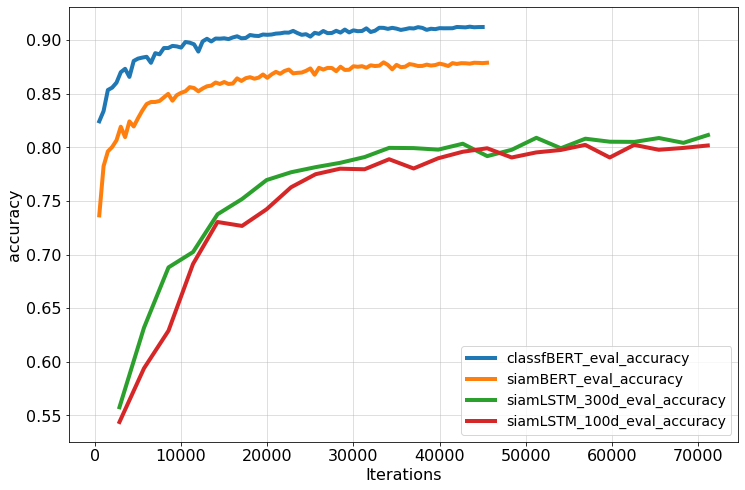

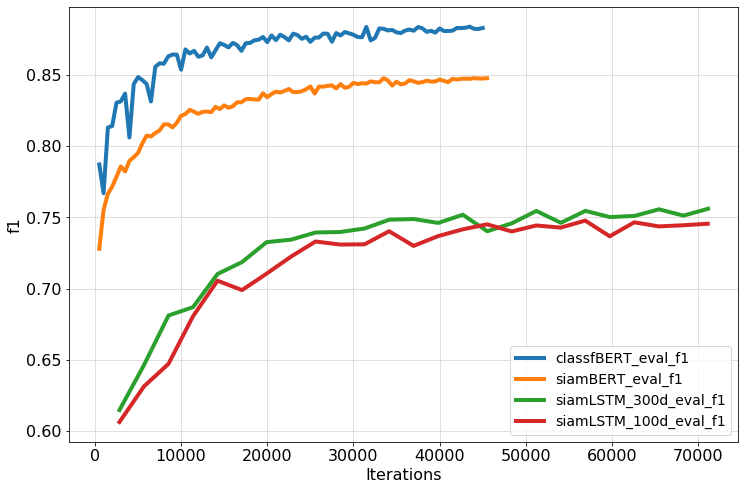

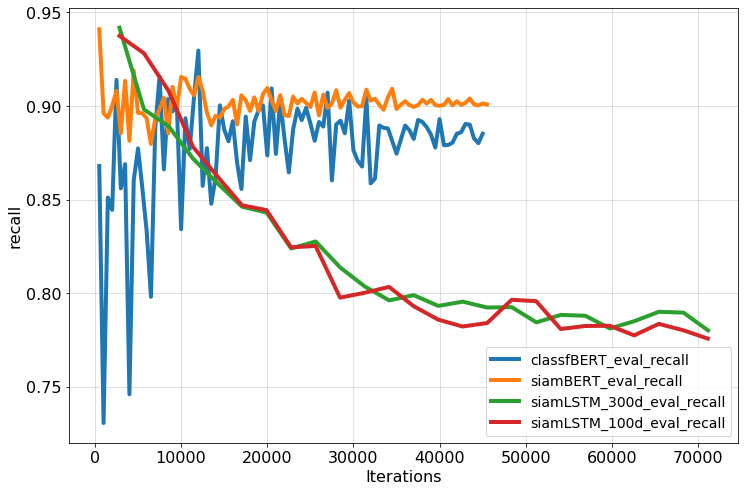

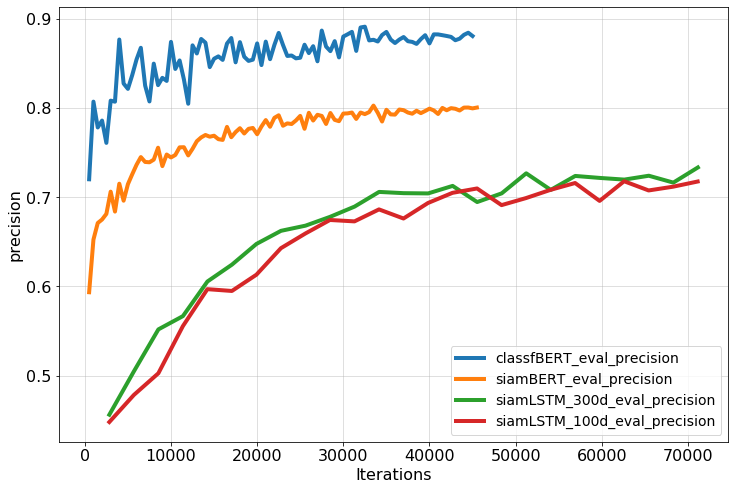

In [143]:
for metric in ['accuracy', 'f1', 'recall', 'precision']:
    plt.figure(figsize=(12,8))
    plt.plot(BERTs_scores_test[f'classfBERT_eval_{metric}'], label=BERTs_scores_test[f'classfBERT_eval_{metric}'].name, linewidth=4)
    plt.plot(BERTs_scores_test[f'siamBERT_eval_{metric}'], label=BERTs_scores_test[f'siamBERT_eval_{metric}'].name, linewidth=4)
    plt.plot(siamLSTM_300d_scores_test[f'siamLSTM_300d_eval_{metric}'], label=siamLSTM_300d_scores_test[f'siamLSTM_300d_eval_{metric}'].name, linewidth=4)
    plt.plot(siamLSTM_100d_scores_test[f'siamLSTM_100d_eval_{metric}'], label=siamLSTM_100d_scores_test[f'siamLSTM_100d_eval_{metric}'].name, linewidth=4)
    plt.grid(alpha=0.5)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Iterations', fontsize=16)
    plt.ylabel(f'{metric}', fontsize=16)
    plt.legend(loc='lower right', fontsize=14)#loc = 'auto'
    plt.savefig(f'./plots_data/all_models_{metric}_scores.png')
    plt.show()

<b> BERTs Loss plots: </b>

In [164]:
BERTs_test_losses = pd.read_csv('./plots_data/test_losses_BERTs.csv')
BERTs_test_losses.columns = ['Step', 'classfBERT_eval_loss', 'siamBERT_eval_loss']
BERTs_train_losses = pd.read_csv('./plots_data/train_losses_BERTs.csv').drop(0, axis=0).reset_index(drop=True)
BERTs_train_losses.columns = ['Step', 'classfBERT_train_loss', 'siamBERT_train_loss']
BERTs_losses = pd.concat([BERTs_test_losses, BERTs_train_losses.drop('Step', axis=1)], axis=1)
BERTs_losses = BERTs_losses.apply(lambda x: list(map(lambda y:np.nan if y =='undefined' else y, x)), axis=0).astype('float64')
BERTs_losses.set_index('Step', inplace=True)

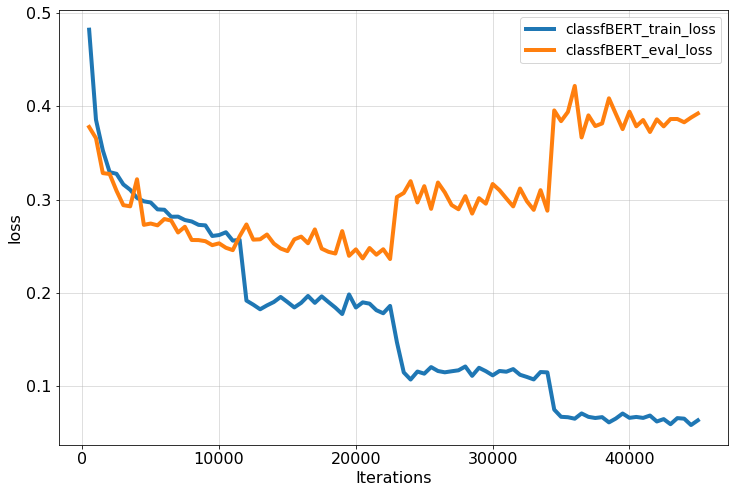

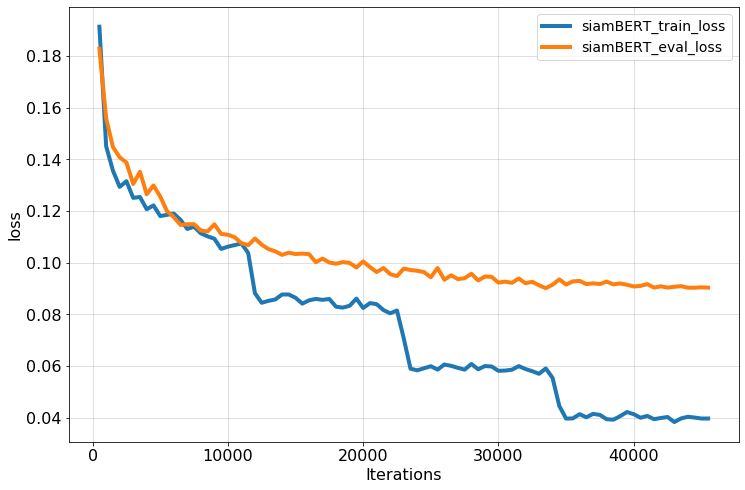

In [167]:
for model in ['classfBERT', 'siamBERT']:
    plt.figure(figsize=(12,8))
    plt.plot(BERTs_losses[f'{model}_train_loss'], label=BERTs_losses[f'{model}_train_loss'].name, linewidth=4)
    plt.plot(BERTs_losses[f'{model}_eval_loss'], label=BERTs_losses[f'{model}_eval_loss'].name, linewidth=4)
    plt.xlabel('Iterations', fontsize=16)
    plt.ylabel('loss', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(alpha=0.5)
    plt.legend(loc='upper right', fontsize=14)#loc = 'auto'
    plt.savefig(f'./plots_data/{model}_losses.png')
    plt.show()

<b> LSTMs loss plots: </b>

In [120]:
siamLSTM_100d_losses = pd.read_csv('./plots_data/siam_lstm_100dglove_train_losses.csv')
siamLSTM_100d_losses.columns = ['siamLSTM_100d_' + i if i !='epoch' else i for i in siamLSTM_100d_losses.columns]
siamLSTM_100d_losses['Step'] = siamLSTM_100d_losses.epoch * 2845
siamLSTM_100d_losses.set_index('Step', inplace=True)

siamLSTM_300d_losses = pd.read_csv('./plots_data/siam_lstm_300dglove_train_losses.csv')
siamLSTM_300d_losses.columns = ['siamLSTM_300d_' + i if i !='epoch' else i for i in siamLSTM_300d_losses.columns]
siamLSTM_300d_losses['Step'] = siamLSTM_300d_losses.epoch * 2845
siamLSTM_300d_losses.set_index('Step', inplace=True)

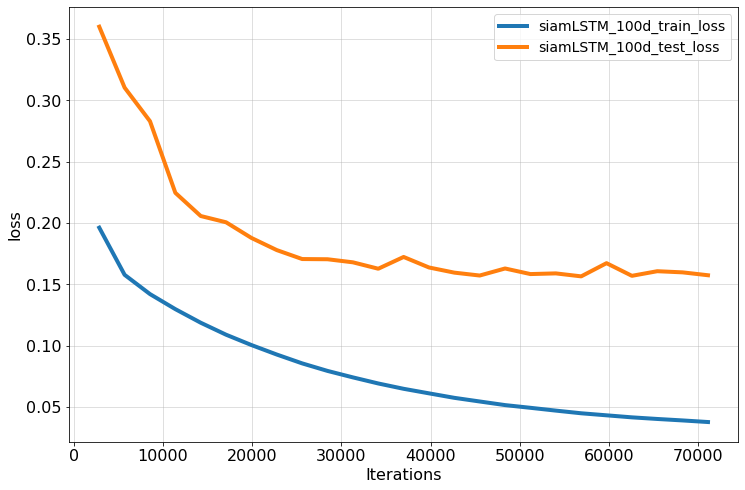

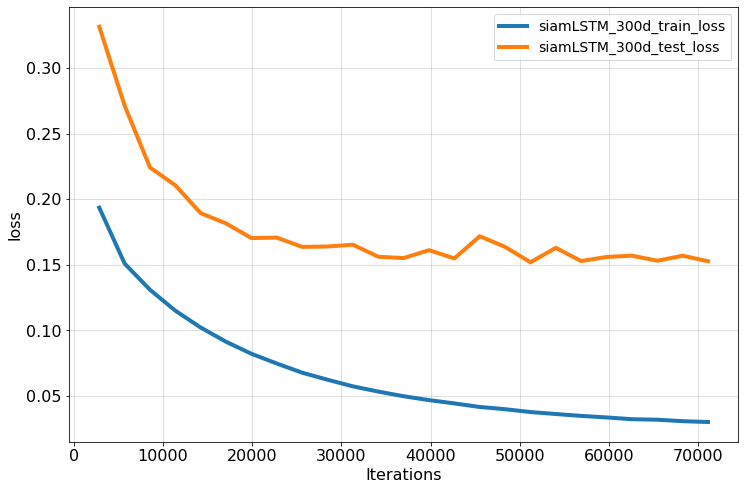

In [144]:
plt.figure(figsize=(12,8))
# plt.title(f'Siamese LSTM losses on train and test dataset throughout the training. GloVe embeddings: 100 dimensional')
plt.plot(siamLSTM_100d_losses['siamLSTM_100d_train_loss'], label=siamLSTM_100d_losses['siamLSTM_100d_train_loss'].name, linewidth=4)
plt.plot(siamLSTM_100d_losses['siamLSTM_100d_test_loss'], label=siamLSTM_100d_losses['siamLSTM_100d_test_loss'].name, linewidth=4)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=0.5)
plt.legend(loc='upper right', fontsize=14)#loc = 'auto'
plt.savefig(f'siamlstm_100d_losses.png')
plt.show()

plt.figure(figsize=(12,8))
# plt.title(f'Siamese LSTM losses on train and test dataset throughout the training. GloVe embeddings: 100 dimensional')
plt.plot(siamLSTM_300d_losses['siamLSTM_300d_train_loss'], label=siamLSTM_300d_losses['siamLSTM_300d_train_loss'].name, linewidth=4)
plt.plot(siamLSTM_300d_losses['siamLSTM_300d_test_loss'], label=siamLSTM_300d_losses['siamLSTM_300d_test_loss'].name, linewidth=4)
plt.xlabel('Iterations', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.grid(alpha=0.5)
plt.legend(loc='upper right', fontsize=14)#loc = 'auto'
plt.savefig(f'siamlstm_300d_losses.png')
plt.show()

Training time barplot:

In [152]:
pd.DataFrame([[54, 52, 256, 73]],columns=['siamLSTM_100d', 'siamLSTM_300d', 'ClassfBERT', 'SiamBERT'], index=['computations_time (minutes)']).to_excel('computations_time.xlsx')